# Images are just Arrays!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from random import random

In [2]:
img = mpimg.imread('./onion.png')
print('length, aka number of rows:', len(img))
print('height, aka number of columns in each row:', len(img[0]))
print('depth, in this case the color channels', len(img[0][0]))
print('Easier just to ask for the shape', img.shape)

length, aka number of rows: 800
height, aka number of columns in each row: 787
depth, in this case the color channels 4
Easier just to ask for the shape (800, 787, 4)


## Render image
We'll learn more about Matplotlib later, for now just feed it the array/image and behold

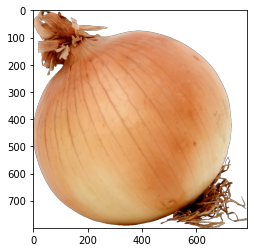

In [3]:
imgplot = plt.imshow(img)

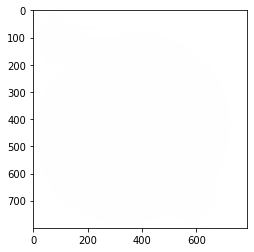

In [4]:
dom_v = np.vectorize(lambda val : round(val))
extreme_img = dom_v(img)
plt.imshow(extreme_img)

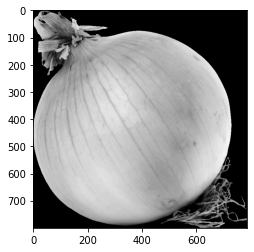

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('onion.png')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

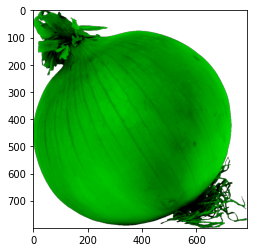

In [6]:
img = mpimg.imread('./onion.png')
img = img * [0,1,0,1]
plt.imshow(img)

In [7]:
# small = np.array([[1,2],[3,4]])
# small = np.array([[1,2,3],[4,5,6],[7,8,9]])
# small = np.array([
#     [1,2,3,4],
#     [5,6,7,8],
#     [9,10,11,12],
#     [13,14,15,16]
# ])

small = np.array([
    [1,2,3],
    [4,5,6]
])

def double_size(small):
    big_height = small.shape[0] * 2
    big_width = small.shape[1] * 2

    big = np.zeros((big_height, big_width), dtype=small.dtype)

    for row in range(big_height):
        for column in range(big_width):
            big[row][column] = small[row//2][column//2]

    return big

print(np.matrix(small))
print(np.matrix(double_size(small)))

[[1 2 3]
 [4 5 6]]
[[1 1 2 2 3 3]
 [1 1 2 2 3 3]
 [4 4 5 5 6 6]
 [4 4 5 5 6 6]]


In [8]:
def double_rgba(small):
    new_h = small.shape[0] * 2
    new_w = small.shape[1] * 2
    new_d = small.shape[2] # don't double depth because that's the color channel

    big = np.ones((new_h, new_w, new_d))

    for row in np.arange(new_h):
        small_row = row // 2
        for column in np.arange(new_w):
            small_column = column // 2
            for channel in np.arange(new_d):
                big[row][column][channel] = small[small_row][small_column][channel]

    return big



In [9]:
def embiggen(small, factor=2):
    
    big = []

    for row in small:
        
        new_row = []
        
        for _ in range(factor):
            big.append(new_row)
        
        for column in row:

            for _ in range(factor):
                new_row.append(column)
            
    return np.array(big)


"""
embiggen will enlarge a matrix by given factor (default 2)

a b        a a b b
c d   ->   a a b b
           c c d d
           c c d d
"""
two_by_two = [['a','b'],['c','d']]

embiggen(two_by_two)



array([['a', 'a', 'b', 'b'],
       ['a', 'a', 'b', 'b'],
       ['c', 'c', 'd', 'd'],
       ['c', 'c', 'd', 'd']], dtype='<U1')

In [10]:
def biggify(mat, factor=2):
    return np.repeat(np.repeat(mat,factor,axis=0),factor,axis=1)

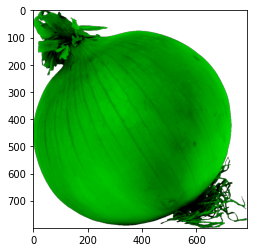

In [11]:
plt.imshow(img)

10.8 ns ± 0.109 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


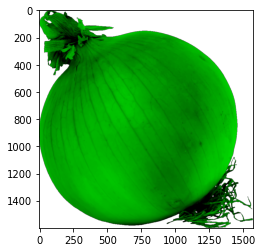

In [12]:
%timeit pass
biggified = biggify(img,2)
plt.imshow(biggified)


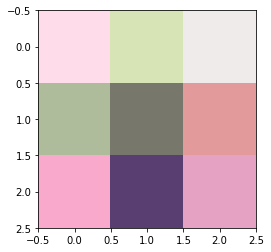

In [13]:
cube = np.random.uniform(size=(3,3,4))
plt.imshow(cube)

## Vectorize

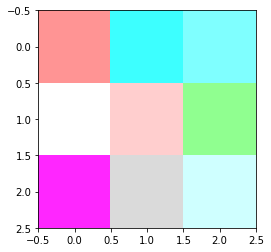

In [14]:
cube = np.random.uniform(size=(3,3,4))

for row in cube:
    for column in cube:
        for channel in column:
            channel[0] = 1 if channel[0] > .5 else 0
            channel[1] = 1 if channel[1] > .5 else 0
            channel[2] = 1 if channel[2] > .5 else 0

plt.imshow(cube)

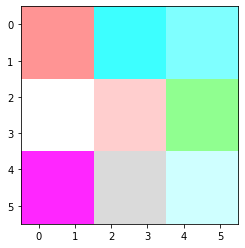

In [15]:
bigger_cube = double_rgba(cube)
plt.imshow(bigger_cube)

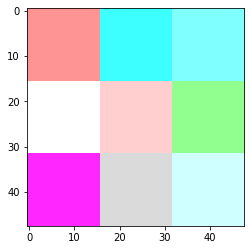

In [16]:
doble_cube = embiggen(cube,16)
plt.imshow(doble_cube)

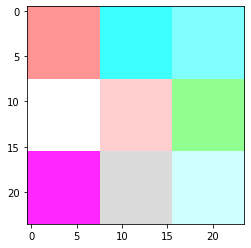

In [17]:
biggie_cube = biggify(cube,8)
plt.imshow(biggie_cube)

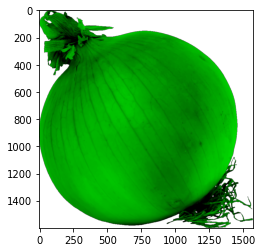

In [18]:
bigger_img = double_rgba(img)
plt.imshow(bigger_img)

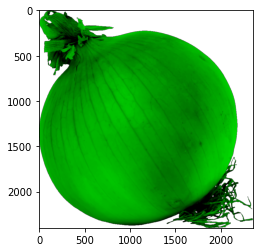

In [19]:
doble_img = embiggen(img,3)
plt.imshow(doble_img)

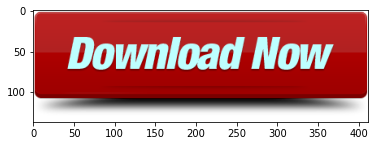

In [20]:
from random import random
download_img = mpimg.imread('download-now-png-4.png')
download_img = download_img * [random(),1,1,1] 
plt.imshow(download_img)
